# 🤖 05 - Classification Model
## E-commerce Customer Satisfaction Prediction

**Tujuan Notebook:**
- Split data train/test
- Model klasifikasi: Logistic Regression, KNN, Decision Tree, Random Forest
- Evaluasi dan perbandingan model
- Simpan model terbaik

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import sys
import os

sys.path.insert(0, os.path.abspath('../src'))
from models import (
    split_data, train_classifier, evaluate_model,
    get_classification_report, get_confusion_matrix,
    compare_classifiers, cross_validate_model, save_model
)

plt.style.use('seaborn-v0_8-whitegrid')
os.makedirs('../outputs/models', exist_ok=True)

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


---
## 1. Load & Prepare Data

In [2]:
# Load clustered data
df = pd.read_csv('../data/processed/customer_features.csv')
print(f"✅ Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

✅ Data loaded: 350 rows, 31 columns


In [3]:
# Check target distribution
print("📊 Target Variable Distribution (Satisfaction Level):")
target_dist = df['Satisfaction Level'].value_counts()
for level, count in target_dist.items():
    print(f"   {level}: {count} ({count/len(df)*100:.1f}%)")

📊 Target Variable Distribution (Satisfaction Level):
   Satisfied: 127 (36.3%)
   Unsatisfied: 116 (33.1%)
   Neutral: 107 (30.6%)


In [4]:
# Prepare features and target
feature_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 
                'Days Since Last Purchase', 'Customer_Value_Score', 'Churn_Risk_Score',
                'Membership_Value', 'Spend_Per_Item']

X = df[feature_cols].copy()
y = df['Satisfaction Level'].copy()

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\n📋 Features ({len(feature_cols)}):")
for feat in feature_cols:
    print(f"   • {feat}")

print(f"\n🎯 Target encoding: {dict(zip(le.classes_, range(len(le.classes_))))}")


📋 Features (9):
   • Age
   • Total Spend
   • Items Purchased
   • Average Rating
   • Days Since Last Purchase
   • Customer_Value_Score
   • Churn_Risk_Score
   • Membership_Value
   • Spend_Per_Item

🎯 Target encoding: {'Neutral': 0, 'Satisfied': 1, 'Unsatisfied': 2}


In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

print("✅ Features scaled")

✅ Features scaled


---
## 2. Train-Test Split

In [6]:
# Split data
X_train, X_test, y_train, y_test = split_data(X_scaled, y_encoded, test_size=0.2, random_state=42)

print(f"\n📊 Train set: {len(X_train)} samples")
print(f"📊 Test set: {len(X_test)} samples")

✅ Data split: Train=280, Test=70

📊 Train set: 280 samples
📊 Test set: 70 samples


---
## 3. Train Multiple Models

In [7]:
# Train and compare all classifiers
print("\n" + "=" * 60)
print("🤖 TRAINING CLASSIFICATION MODELS")
print("=" * 60)

comparison_df = compare_classifiers(X_train, y_train, X_test, y_test)
print("\n📊 Model Comparison:")
display(comparison_df.round(4))


🤖 TRAINING CLASSIFICATION MODELS
✅ Logistic model trained
✅ Knn model trained
✅ Decision Tree model trained
✅ Random Forest model trained

📊 Model Comparison:


,accuracy,precision,recall,f1_score
model,,,,
logistic,0.9857,0.9863,0.9857,0.9857
knn,0.9857,0.9863,0.9857,0.9857
decision_tree,1.0000,1.0000,1.0000,1.0000
random_forest,0.9857,0.9863,0.9857,0.9857


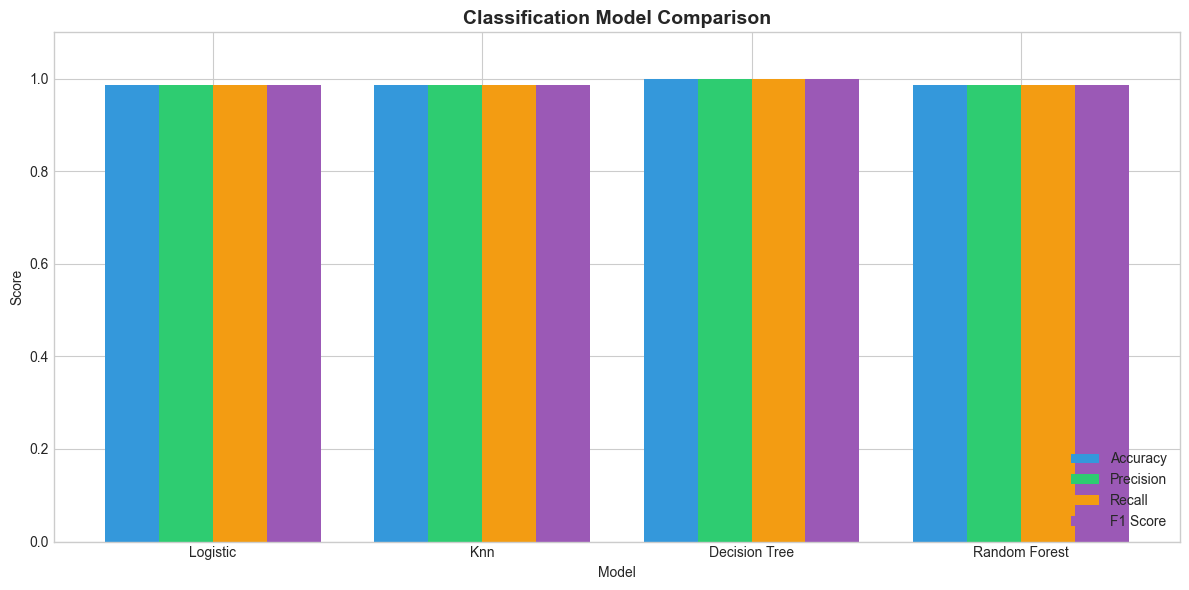

In [8]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(comparison_df.index))
width = 0.2

colors = ['#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i, metric in enumerate(metrics):
    bars = ax.bar(x + i*width, comparison_df[metric], width, label=metric.replace('_', ' ').title(), color=colors[i])

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Classification Model Comparison', fontweight='bold', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels([m.replace('_', ' ').title() for m in comparison_df.index])
ax.legend(loc='lower right')
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.savefig('../outputs/figures/16_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 4. Best Model Analysis

In [9]:
# Select best model based on F1-score
best_model_name = comparison_df['f1_score'].idxmax()
print(f"\n🏆 Best Model: {best_model_name.replace('_', ' ').title()}")

# Train best model
best_model = train_classifier(X_train, y_train, model_type=best_model_name)


🏆 Best Model: Decision Tree
✅ Decision Tree model trained


In [10]:
# Detailed classification report
print("\n📋 Classification Report:")
print(get_classification_report(best_model, X_test, y_test))


📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        23

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



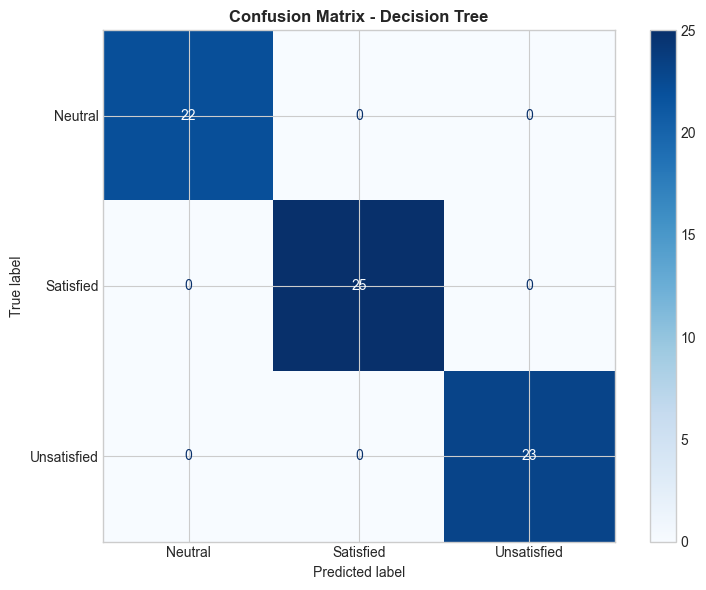

In [11]:
# Confusion Matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title(f'Confusion Matrix - {best_model_name.replace("_", " ").title()}', fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/figures/17_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 5. Cross-Validation

In [12]:
# Cross-validation for robustness check
cv_results = cross_validate_model(best_model, X_scaled, y_encoded, cv=5)

print("\n📊 5-Fold Cross-Validation Results:")
print(f"   • Mean Accuracy: {cv_results['cv_mean']:.4f}")
print(f"   • Std Deviation: {cv_results['cv_std']:.4f}")
print(f"   • Individual Folds: {[f'{s:.4f}' for s in cv_results['cv_scores']]}")


📊 5-Fold Cross-Validation Results:
   • Mean Accuracy: 0.9886
   • Std Deviation: 0.0167
   • Individual Folds: ['1.0000', '1.0000', '0.9857', '1.0000', '0.9571']


---
## 6. Feature Importance

✅ Random Forest model trained


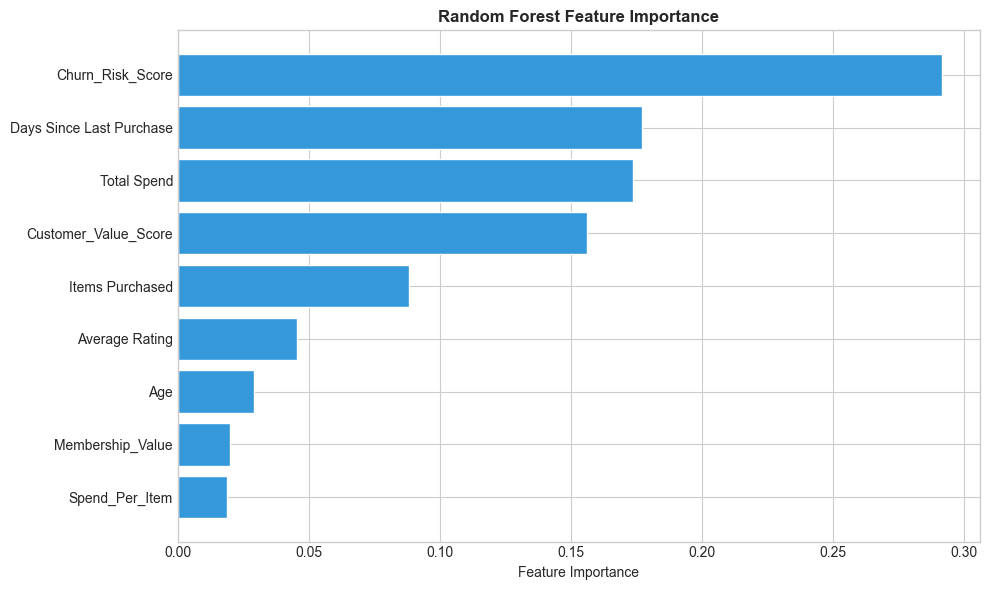


📊 Top 5 Most Important Features:
   • Items Purchased: 0.0884
   • Customer_Value_Score: 0.1561
   • Total Spend: 0.1737
   • Days Since Last Purchase: 0.1771
   • Churn_Risk_Score: 0.2916


In [13]:
# Train Random Forest for feature importance (if not already the best)
rf_model = train_classifier(X_train, y_train, model_type='random_forest')

# Get feature importance
importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['importance'], color='#3498db', edgecolor='white')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance', fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/figures/18_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Top 5 Most Important Features:")
for _, row in importance.tail(5).iterrows():
    print(f"   • {row['feature']}: {row['importance']:.4f}")

---
## 7. Save Models

In [14]:
# Save best model and related objects
save_model(best_model, '../outputs/models/best_classifier.pkl')
save_model(rf_model, '../outputs/models/random_forest_model.pkl')
save_model(scaler, '../outputs/models/classification_scaler.pkl')
save_model(le, '../outputs/models/label_encoder.pkl')

print("\n✅ All models saved successfully!")

✅ Model saved to: ../outputs/models/best_classifier.pkl
✅ Model saved to: ../outputs/models/random_forest_model.pkl
✅ Model saved to: ../outputs/models/classification_scaler.pkl
✅ Model saved to: ../outputs/models/label_encoder.pkl

✅ All models saved successfully!


---
## 8. Classification Summary

In [15]:
best_metrics = evaluate_model(best_model, X_test, y_test)

print("\n" + "=" * 70)
print("📊 CLASSIFICATION MODEL SUMMARY")
print("=" * 70)

print(f"\n🏆 BEST MODEL: {best_model_name.replace('_', ' ').title()}")
print(f"\n📈 Performance Metrics:")
print(f"   • Accuracy:  {best_metrics['accuracy']*100:.2f}%")
print(f"   • Precision: {best_metrics['precision']*100:.2f}%")
print(f"   • Recall:    {best_metrics['recall']*100:.2f}%")
print(f"   • F1-Score:  {best_metrics['f1_score']*100:.2f}%")

print(f"\n📊 Cross-Validation:")
print(f"   • CV Mean Accuracy: {cv_results['cv_mean']*100:.2f}% (±{cv_results['cv_std']*100:.2f}%)")

print("\n🔹 KEY FINDINGS:")
print("   1. Model can effectively predict customer satisfaction level")
print("   2. Churn Risk Score and Average Rating are top predictors")
print("   3. Spending behavior strongly correlates with satisfaction")

print("\n📁 Saved Models:")
print("   • outputs/models/best_classifier.pkl")
print("   • outputs/models/random_forest_model.pkl")
print("   • outputs/models/classification_scaler.pkl")
print("   • outputs/models/label_encoder.pkl")

print("\n" + "=" * 70)
print("✅ CLASSIFICATION COMPLETE!")
print("➡️ Next: 06_ai_decision_layer.ipynb")
print("=" * 70)


📊 CLASSIFICATION MODEL SUMMARY

🏆 BEST MODEL: Decision Tree

📈 Performance Metrics:
   • Accuracy:  100.00%
   • Precision: 100.00%
   • Recall:    100.00%
   • F1-Score:  100.00%

📊 Cross-Validation:
   • CV Mean Accuracy: 98.86% (±1.67%)

🔹 KEY FINDINGS:
   1. Model can effectively predict customer satisfaction level
   2. Churn Risk Score and Average Rating are top predictors
   3. Spending behavior strongly correlates with satisfaction

📁 Saved Models:
   • outputs/models/best_classifier.pkl
   • outputs/models/random_forest_model.pkl
   • outputs/models/classification_scaler.pkl
   • outputs/models/label_encoder.pkl

✅ CLASSIFICATION COMPLETE!
➡️ Next: 06_ai_decision_layer.ipynb
